# Part-to-whole
Show how a single entity can be broken down into its component elements. If the reader's interest is solely in the size of the components, consider a magnitude-type chart instead

In [1]:
import pandas as pd
import numpy as np
#ggplot equivalent: plotnine
from plotnine import *
#scales package equivalent: mizani
from mizani.breaks import *
from mizani.formatters import *
import utils

## Stacked column

A simple way of showing part-to-whole relationships but can be difficult to read with more than a few components

In [3]:
df = pd.read_csv('data/marimekko.csv')
df_agg = df[['Region','Sales']].groupby('Region').sum().reset_index()
df =df.merge(df_agg,on='Region')
df['per'] = df['Sales_x']/df['Sales_y']
df.head()

,Region,Year,Sales_x,Sales_y,per
0,West,2018,250137.86,725385.27,0.344834
1,West,2017,187458.30,725385.27,0.258426
2,West,2016,139940.81,725385.27,0.192919
3,West,2015,147848.30,725385.27,0.203820
4,East,2018,213069.43,678781.24,0.313900


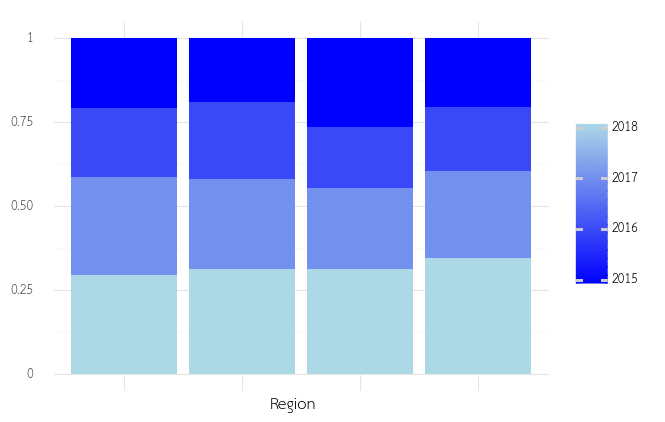

<ggplot: (-9223363305206076686)>

In [5]:
g = (ggplot(df,aes(x='Region',y='per',fill='Year')) +
     geom_col() + 
     scale_fill_gradient(low='blue',high='lightblue') +
     theme(legend_title=element_blank(),axis_text_x=element_blank()) +
     ylab('')
    )
g

## Marimekko
A good way of showing the size and proportion of data at the same time - as long as the data are not too complicated

In [7]:
df = pd.read_csv('data/marimekko.csv')
df_agg = df[['Region','Sales']].groupby('Region').sum().reset_index()
df =df.merge(df_agg,on='Region')
df['per'] = df['Sales_x']/df['Sales_y']
df.head()

,Region,Year,Sales_x,Sales_y,per
0,West,2018,250137.86,725385.27,0.344834
1,West,2017,187458.30,725385.27,0.258426
2,West,2016,139940.81,725385.27,0.192919
3,West,2015,147848.30,725385.27,0.203820
4,East,2018,213069.43,678781.24,0.313900


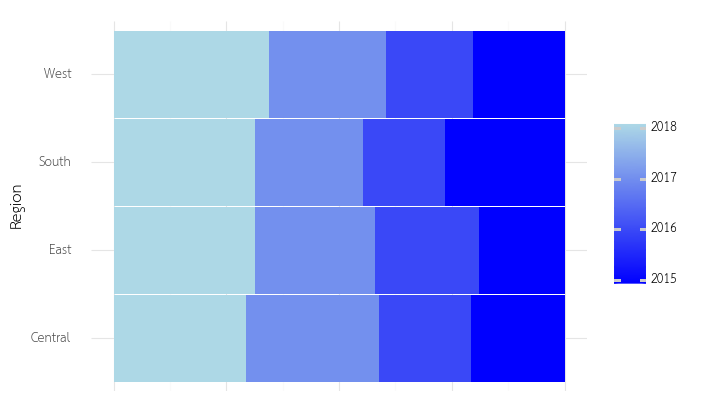

<ggplot: (-9223363305207179846)>

In [8]:
g = (ggplot(df,aes(x='Region',y='per',fill='Year')) +
     geom_col(width=0.99) + coord_flip() +
     scale_fill_gradient(low='blue',high='lightblue') +
     theme(legend_title=element_blank(),axis_text_x=element_blank()) +
     ylab('')
    )
g

## ~~Pie~~
~~A common way of showing part-to-whole data - but be aware that it's difficult to accurately compare the size of the segments.~~ It has been widely debated why we should not use pie chart such as [this thread](https://stats.stackexchange.com/questions/8974/problems-with-pie-charts). Use gridplot instead.

## ~~Donut~~

~~Similar to a pie chart - but the centre can be a good way of making space to include more information about the data (eg. total).~~ It has been widely debated why we should not use pie chart such as [this thread](https://stats.stackexchange.com/questions/8974/problems-with-pie-charts). Use gridplot instead.

## Treemap

Use for hierarchical part-to-whole relationships; can be difficult to read when there are many small segments. We use `squarify` instead of `plotnine`

In [38]:
# !pip install squarify
import squarify

You are using pip version 19.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [51]:
df = pd.read_csv('data/treemap.csv').sort_values('Sales',ascending=False)
df['label'] = None
df.iloc[:10,3] = df.iloc[:10,1]
df.head()

,Category,Sub-Category,Sales,label
0,Technology,Phones,330007.05,Phones
15,Furniture,Chairs,328449.10,Chairs
5,Office Supplies,Storage,223843.61,Storage
13,Furniture,Tables,206965.53,Tables
10,Office Supplies,Binders,203412.73,Binders


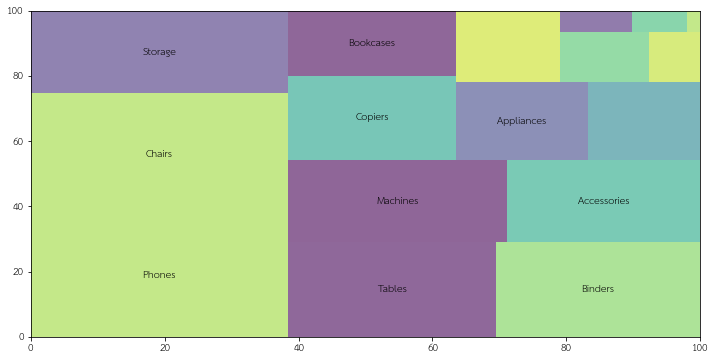

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
squarify.plot(label=df['label'],sizes=df.Sales,alpha=.6)

## Voronoi

A way of turning points into areas - any point within the area is closer to the central point than any other point

## Arc

A hemicycle, often used for visualising political results. But really, you do not need to curve it.

In [10]:
df = pd.read_csv('data/ordered-bar.csv')
df['per'] = df['Sales'] / df['Sales'].sum()
df.head()

,Region,Sales,per
0,South,391721.90,0.170521
1,Central,501239.89,0.218196
2,East,678781.24,0.295482
3,West,725457.82,0.315801


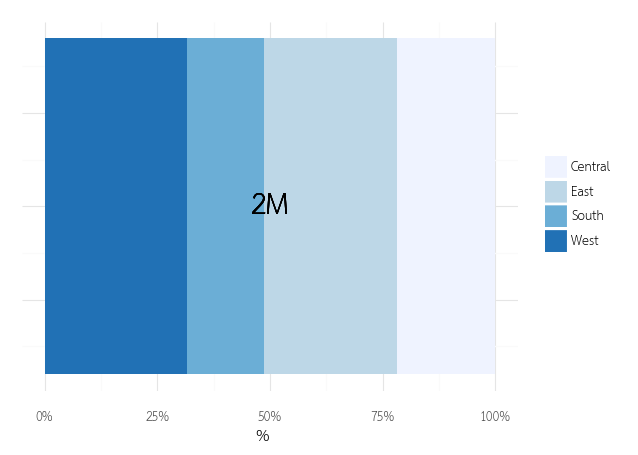

<ggplot: (8731640306864)>

In [33]:
g = (ggplot(df,aes(x=1,y='per',fill='Region')) +
     geom_col() + coord_flip() +
     scale_fill_brewer() +
     geom_text(x=1,y=0.5,label='2M',size=20) +
     theme(legend_title=element_blank(),
           axis_text_y=element_blank()) +
     xlab('') + ylab('%') +
     scale_y_continuous(labels=percent_format())
    )
g

## Gridplot

Good for showing % information, they work best when used on whole numbers and work well in multiple layout form.

In [57]:
df = []
for i in range(10):
    for j in range(10):
        df.append({'x':i,'y':j})
df = pd.DataFrame(df)
df['filled'] = 0
df.iloc[:32,2] = 1
df.head()

,x,y,filled
0,0,0,1
1,0,1,1
2,0,2,1
3,0,3,1
4,0,4,1


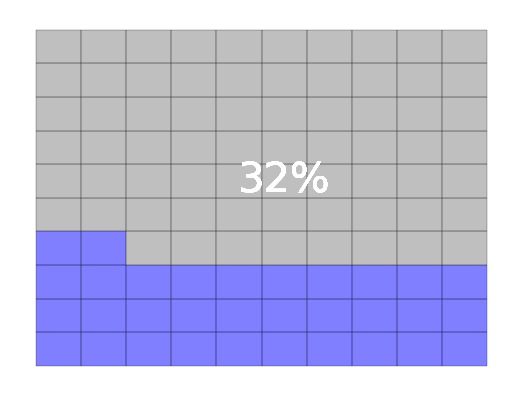

<ggplot: (-9223363305216057456)>

In [78]:
g = (ggplot(df, aes(x='x',y='y',fill='factor(filled)')) +
     geom_tile(alpha=0.5,color='black') + guides(fill=False) +
     scale_fill_manual(['grey','blue']) + #manual fill
     theme_void() + coord_flip() +#remove grid 
     geom_text(x=5,y=5,label=f'{int(100*df.filled.mean())}%',size=30,color='white') +
     theme(axis_text=element_blank()) + xlab('') + ylab('') 
    )
g

## Venn
Generally only used for schematic representation. Not available in `ggplot` so we use `matplotlib_venn` instead.

In [83]:
# !pip install matplotlib-venn
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

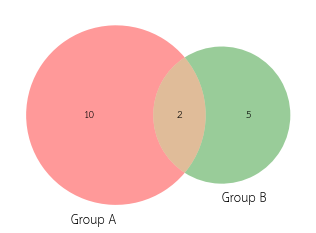

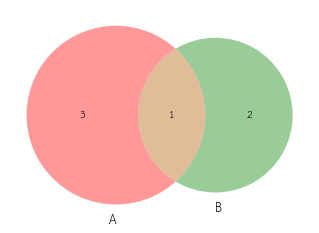

In [84]:
# First way to call the 2 group Venn diagram:
venn2(subsets = (10, 5, 2), set_labels = ('Group A', 'Group B'))
plt.show()
 
# Second way
venn2([set(['A', 'B', 'C', 'D']), set(['D', 'E', 'F'])])
plt.show()


## Waterfall

Can be useful for showing part-to-whole relationships where some of the components are negative.

In [34]:
df = pd.DataFrame({'variable':['Revenue','Other','Sales Expense','R&D','Other Income','Profit'],
                   'kind':['net','out','out','out','in','net'],
                   'value':[4000,-400,-2000,-600,100,1100]})
df

,variable,kind,value
0,Revenue,net,4000
1,Other,out,-400
2,Sales Expense,out,-2000
3,R&D,out,-600
4,Other Income,in,100
5,Profit,net,1100


In [35]:
#order cats
ordered_cats = df['variable']
df['variable'] = pd.Categorical(df['variable'], categories=ordered_cats, ordered=True)
#create the water fall
df['start'] = 0
df['end'] = 0
df['id'] = range(1,df.shape[0]+1)
for i in range(df.shape[0]):
    if df.iloc[i,1]=='net':
        df.iloc[i,4] = df.iloc[i,2] #set end
    else:
        df.iloc[i,3] = df.iloc[i-1,4] #set start equals to previous end
        df.iloc[i,4] = df.iloc[i,3] + df.iloc[i,2] #set end equals to start + value
df

,variable,kind,value,start,end,id
0,Revenue,net,4000,0,4000,1
1,Other,out,-400,4000,3600,2
2,Sales Expense,out,-2000,3600,1600,3
3,R&D,out,-600,1600,1000,4
4,Other Income,in,100,1000,1100,5
5,Profit,net,1100,0,1100,6


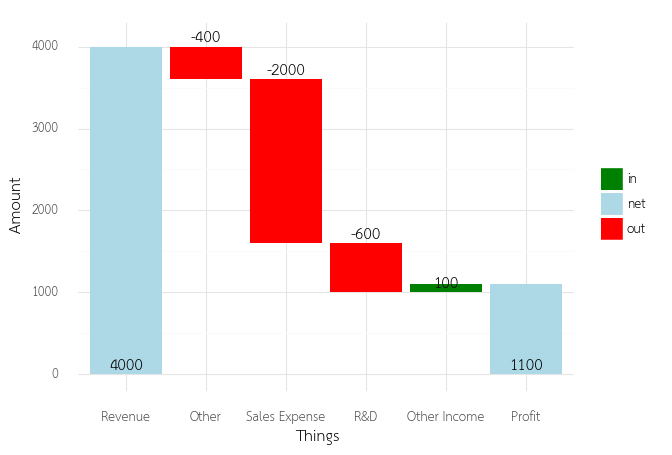

<ggplot: (8731640207210)>

In [36]:
g = (ggplot(df,aes(fill='kind')) +
     #draw rectangles
     geom_rect(aes(x='variable',xmin='id-0.45',xmax='id+0.45',
              ymin='end',ymax='start')) +
     geom_text(aes(x='variable',y='start+100',label='value')) +
     scale_fill_manual(values=['green','lightblue','red']) +
     xlab('Things') + ylab('Amount') +
     theme(legend_title=element_blank())
    )
g